# ABEL collider tracking example

By Carl A. Lindstrøm (University of Oslo), 8 Sep 2023

### Import ABEL framework and required classes

In [1]:
import sys
sys.path.append('../')
from abel import *
import numpy as np
import scipy.constants as SI

[INFO    ] csr.py: module PYFFTW is not installed. Install it to speed up calculation.
[INFO    ] csr.py: module NUMEXPR is not installed. Install it to speed up calculation


initializing ocelot...
import: module PYFFTW is not installed. Install it to speed up calculation
import: module NUMEXPR is not installed. Install it to speed up calculation


### Define electron linac (PWFA)

In [2]:
# define driver
driver = SourceBasic()
driver.charge = -2.7e10 * SI.e # [C]
driver.energy = 31.25e9 # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 42e-6 # [m]
driver.z_offset = 300e-6 # [m]
driver.emit_nx, driver.emit_ny = 10e-6, 10e-6 # [m rad]
driver.beta_x, driver.beta_y = 30e-3, 30e-3 # [m]
driver.num_particles = 5000
driver.wallplug_efficiency = 0.5

# define stage
stage = StageQuasistatic2d()
stage.driver_source = driver
stage.nom_energy_gain = 31.9e9 # [eV]
stage.length = 5 # [m]
stage.plasma_density = 7e21 # [m^-3]
stage.ramp_beta_mag = 5

# define first stage (half length)
first_stage = StageQuasistatic2d()
first_stage.driver_source = stage.driver_source
first_stage.nom_energy_gain = stage.nom_energy_gain/2
first_stage.length = stage.length/2
first_stage.plasma_density = stage.plasma_density
first_stage.ramp_beta_mag = stage.ramp_beta_mag

# define beam
esource = SourceBasic()
esource.charge = -1e10 * SI.e # [C]
esource.energy = 5e9 # [eV]
esource.rel_energy_spread = 0.01
esource.bunch_length = 18e-6 # [m]
esource.z_offset = -34e-6 # [m]
esource.emit_nx, esource.emit_ny = 160e-6, 0.56e-6 # [m rad]
esource.beta_x = stage.matched_beta_function(esource.energy)
esource.beta_y = esource.beta_x
esource.num_particles = 5000
esource.wallplug_efficiency = 0.1
esource.accel_gradient = 25e6 # [V/m]

# define interstage
interstage = InterstageBasic()
interstage.beta0 = lambda E: stage.matched_beta_function(E)
interstage.dipole_length = lambda E: 1 * np.sqrt(E/10e9) # [m(eV)]
interstage.dipole_field = 0.5 # [T]

# define electron beam delivery system
ebds = BeamDeliverySystemBasic()
ebds.beta_x, ebds.beta_y = 3.3e-3, 0.1e-3 # [m]
ebds.bunch_length = 0.75 * ebds.beta_y

# define electron linac
elinac = Linac()
elinac.source = esource
elinac.first_stage = first_stage
elinac.stage = stage
elinac.interstage = interstage
elinac.bds = ebds
elinac.num_stages = 16

### Define the positron linac (RF)

In [3]:
# define positron source
psource = SourceBasic()
psource.charge = 4e10 * SI.e # [C]
psource.energy = 31.25e9 # [eV]
psource.rel_energy_spread = 0.0015
psource.bunch_length = 75e-6 # [m]
psource.emit_nx, psource.emit_ny = 10e-6, 0.035e-6 # [m rad]
psource.beta_x = 3.3e-3 # [m]
psource.beta_y = 0.1e-3 # [m]
psource.num_particles = esource.num_particles
psource.wallplug_efficiency = 0.5
psource.accel_gradient = 25e6 # [V/m]

# define positron beam delivery system
pbds = BeamDeliverySystemBasic()
pbds.beta_x = psource.beta_x
pbds.beta_y = psource.beta_y

# define positron linac
plinac = Linac()
plinac.source = psource
plinac.bds = pbds

### Define the IP and collider

In [4]:
# define interaction point
ip = InteractionPointBasic()

# define collider (with two different linacs)
collider = Collider()
collider.linac1 = elinac
collider.linac2 = plinac
collider.ip = ip

### Perform collider tracking

In [5]:
# track particles
beam1, beam2 = collider.run('collider_example', num_shots=1, overwrite=False);

>> LINAC #1
Tracking element 1 (s = 200.0 m, -1.60 nC, 5.0 GeV, SourceBasic, stage 0)


/Users/ben_c/Library/CloudStorage/OneDrive-UniversitetetiOslo/Software/opal_env/lib/python3.10/site-packages/aptools/data_analysis/beam_diagnostics.py:524: RuntimeWarning: invalid value encountered in sqrt
  em_x = np.sqrt(np.linalg.det(cov_x.astype(np.float32, copy=False)))


Tracking element 2 (s = 202.5 m, -1.60 nC, 20.8 GeV, StageQuasistatic2d, stage 1)
Tracking element 3 (s = 209.4 m, -1.60 nC, 20.8 GeV, InterstageBasic, stage 1)
Tracking element 4 (s = 214.4 m, -1.60 nC, 53.0 GeV, StageQuasistatic2d, stage 2)
Tracking element 5 (s = 225.4 m, -1.60 nC, 53.0 GeV, InterstageBasic, stage 2)
Tracking element 6 (s = 230.4 m, -1.60 nC, 84.6 GeV, StageQuasistatic2d, stage 3)
Tracking element 7 (s = 244.4 m, -1.60 nC, 84.6 GeV, InterstageBasic, stage 3)
Tracking element 8 (s = 249.4 m, -1.60 nC, 116.5 GeV, StageQuasistatic2d, stage 4)
Tracking element 9 (s = 265.7 m, -1.60 nC, 116.5 GeV, InterstageBasic, stage 4)
Tracking element 10 (s = 270.7 m, -1.60 nC, 148.4 GeV, StageQuasistatic2d, stage 5)
Tracking element 11 (s = 289.2 m, -1.60 nC, 148.4 GeV, InterstageBasic, stage 5)
Tracking element 12 (s = 294.2 m, -1.60 nC, 180.6 GeV, StageQuasistatic2d, stage 6)
Tracking element 13 (s = 314.5 m, -1.60 nC, 180.6 GeV, InterstageBasic, stage 6)
Tracking element 14 (s =

### Plot the wakefield structure

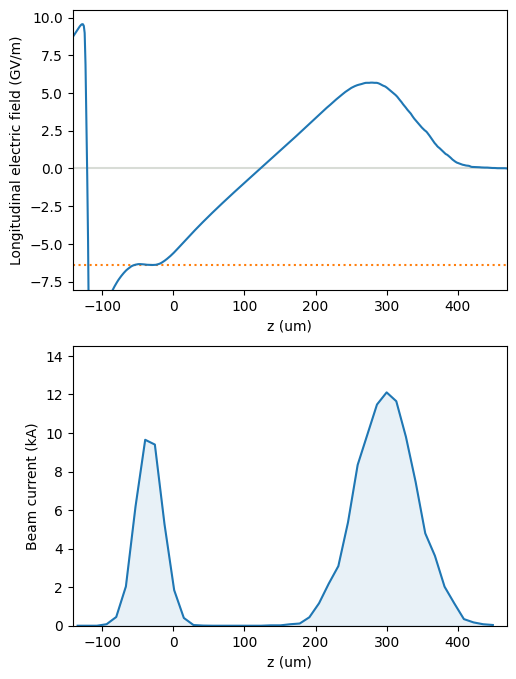

In [6]:
# plot wakefield
elinac.stages[0].plot_wakefield()

### Plot the beam evolution in the linac

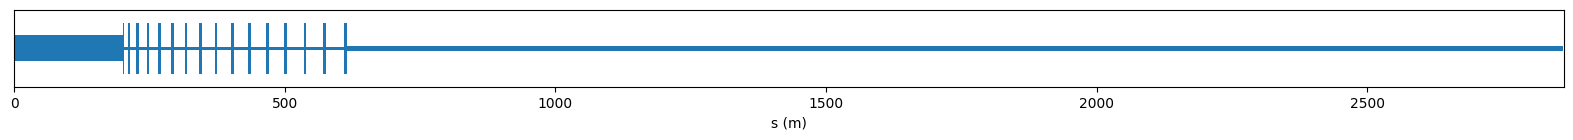

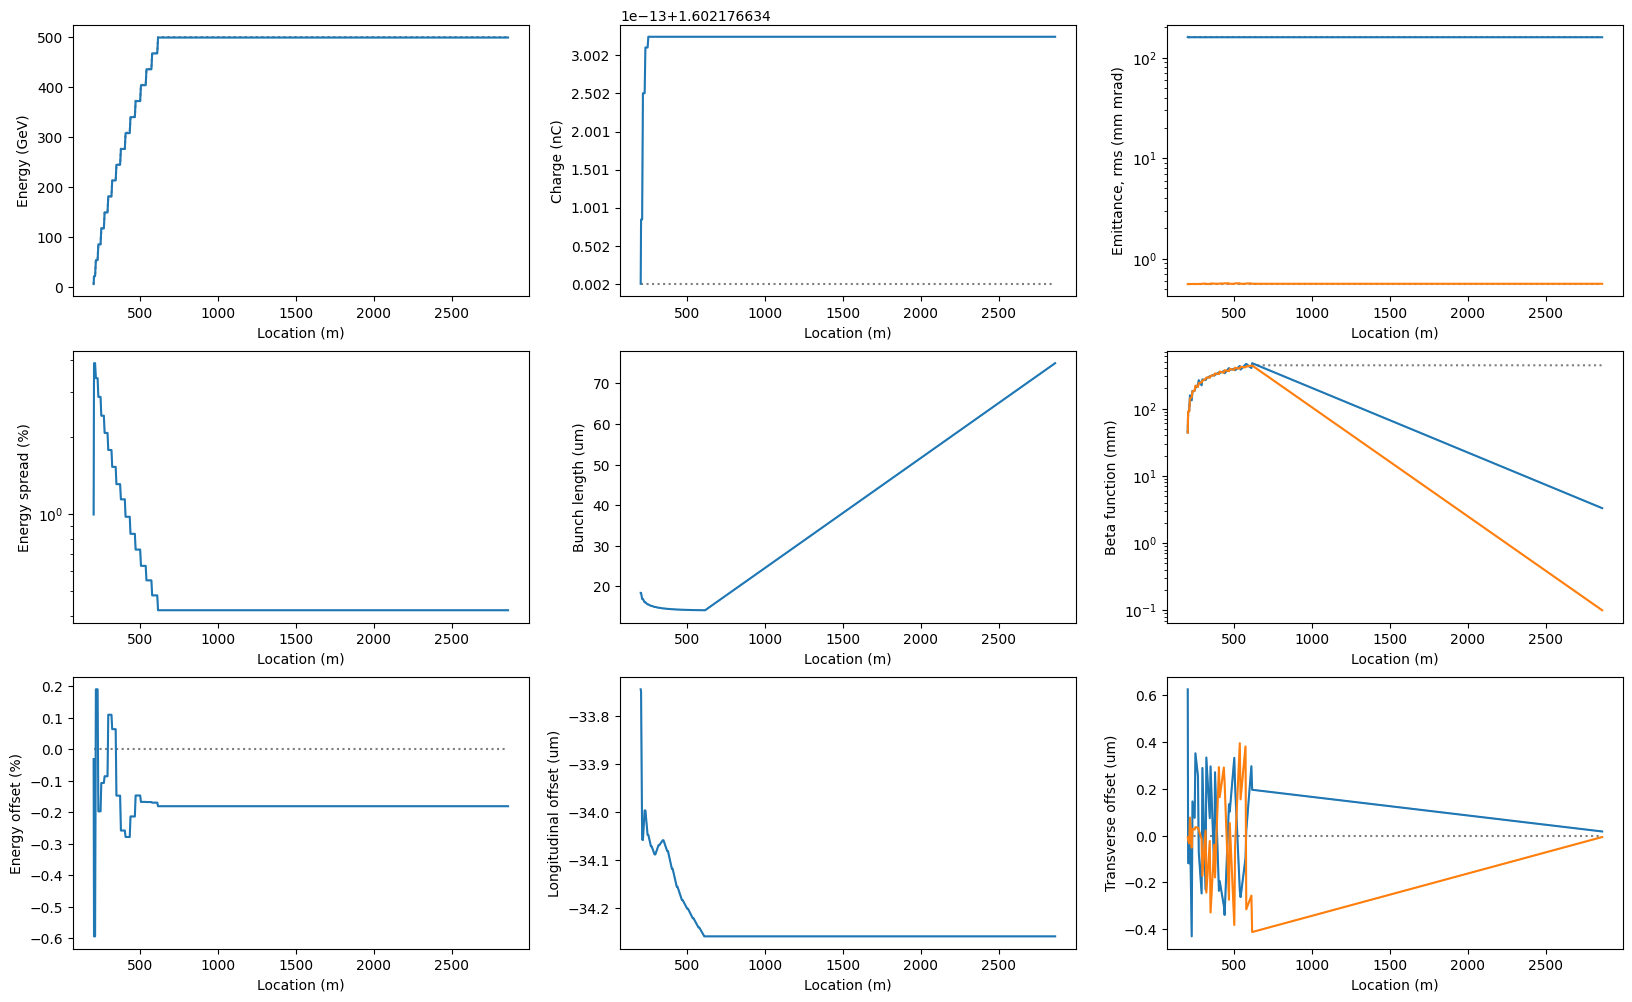

In [7]:
# plot beam evolution and linac survey
elinac.plot_survey()
elinac.plot_evolution(use_stage_nums=False)

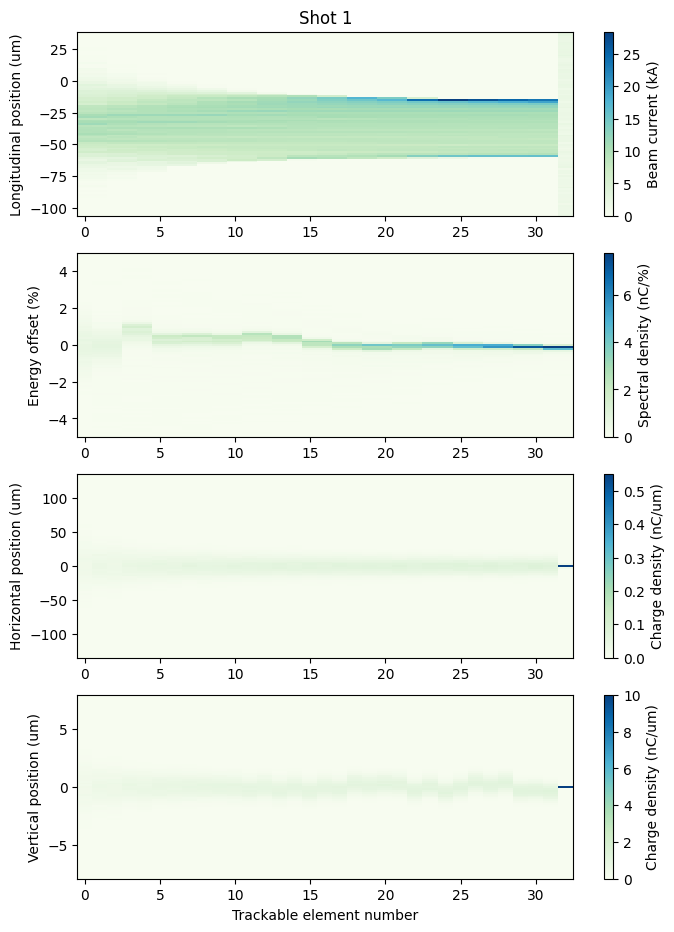

In [8]:
elinac.plot_waterfalls()

### Plot the collider luminosity

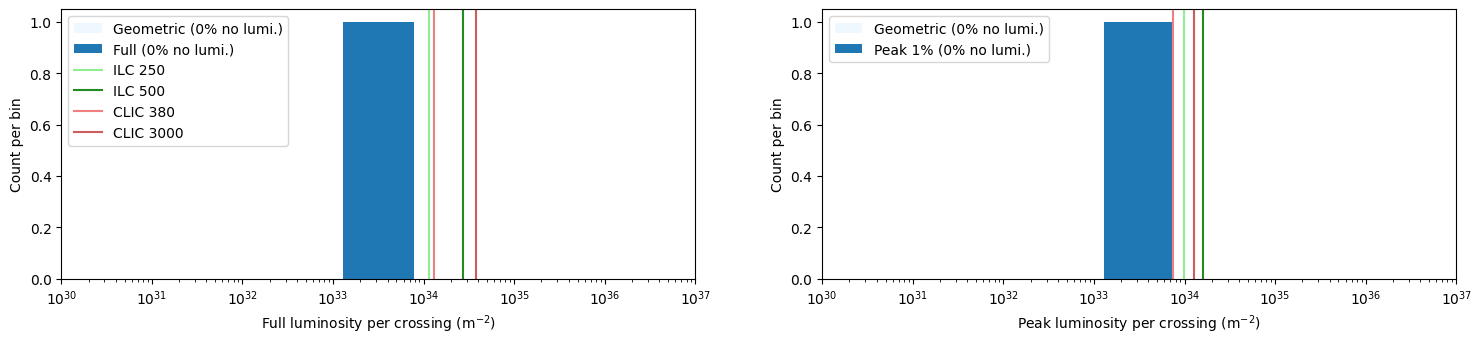

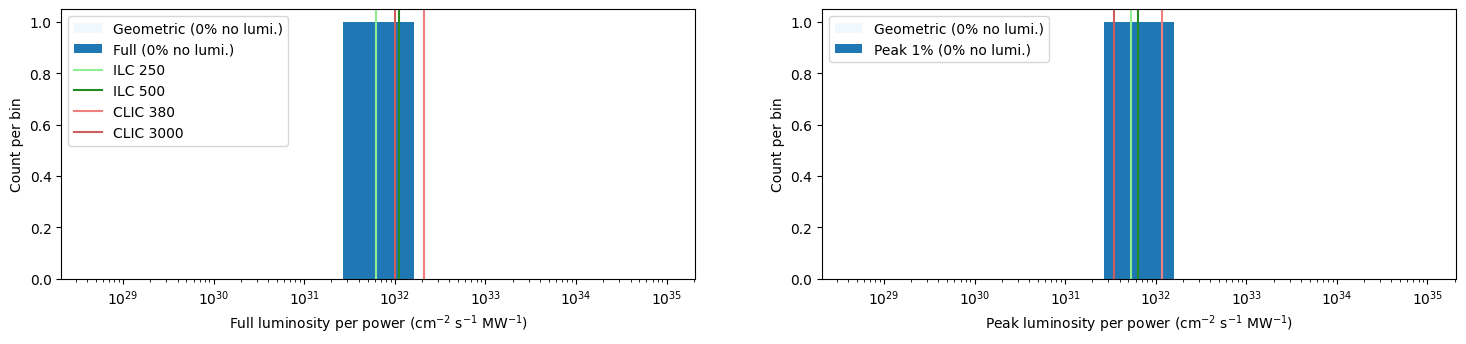

In [9]:
# plot luminosity
collider.plot_luminosity()

# plot luminosity per power
collider.plot_luminosity_per_power()